In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [44]:
wine_data = load_wine()
wine_dataframe = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_dataframe['target'] = wine_data.target

In [45]:
print(wine_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [46]:
print("Первые пять записей данных:")
first_five_records = wine_dataframe.iloc[:5].values
for record in first_five_records:
    print(record)

print("\nИмена признаков:")
features = wine_data.feature_names
for feature in features:
    print(feature)

print("\nИмена целевых классов:")
target_classes = wine_data.target_names
for target in target_classes:
    print(target)

print("\nКраткое описание:")
description_excerpt = wine_data.DESCR.split('\n')[:10]  
for line in description_excerpt:
    print(line)


Первые пять записей данных:
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03 0.000e+00]
[1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03 0.00e+00]
[1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
 3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03 0.000e+00]
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03 0.000e+00]
[1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
 3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02 0.000e+00]

Имена признаков:
alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline

Имена целевых классов:
class_0
class_1
class_2

Краткое описание:
.. _wine_dataset

In [47]:
features_matrix = wine_dataframe.drop('target', axis=1)
target_vector = wine_dataframe['target']

X_train, X_test, y_train, y_test = train_test_split(
    features_matrix, 
    target_vector, 
    test_size=0.25, 
    random_state=42
)

/tmp/ipykernel_25168/2822774345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=wine_dataframe, palette='viridis')


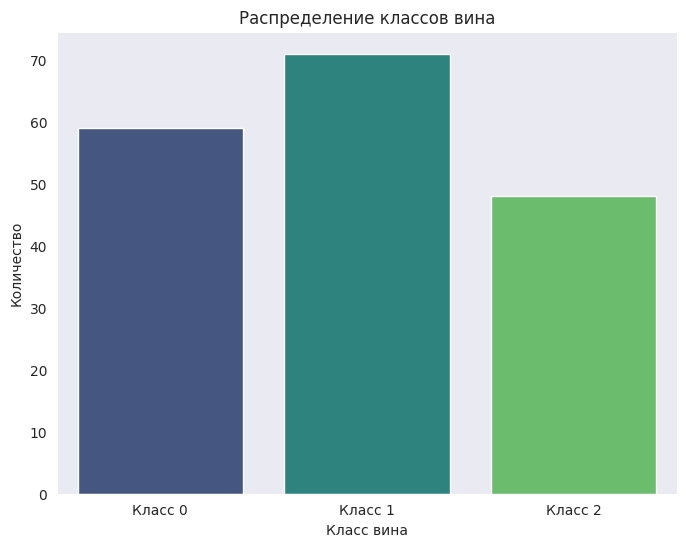

<Figure size 1200x1000 with 0 Axes>

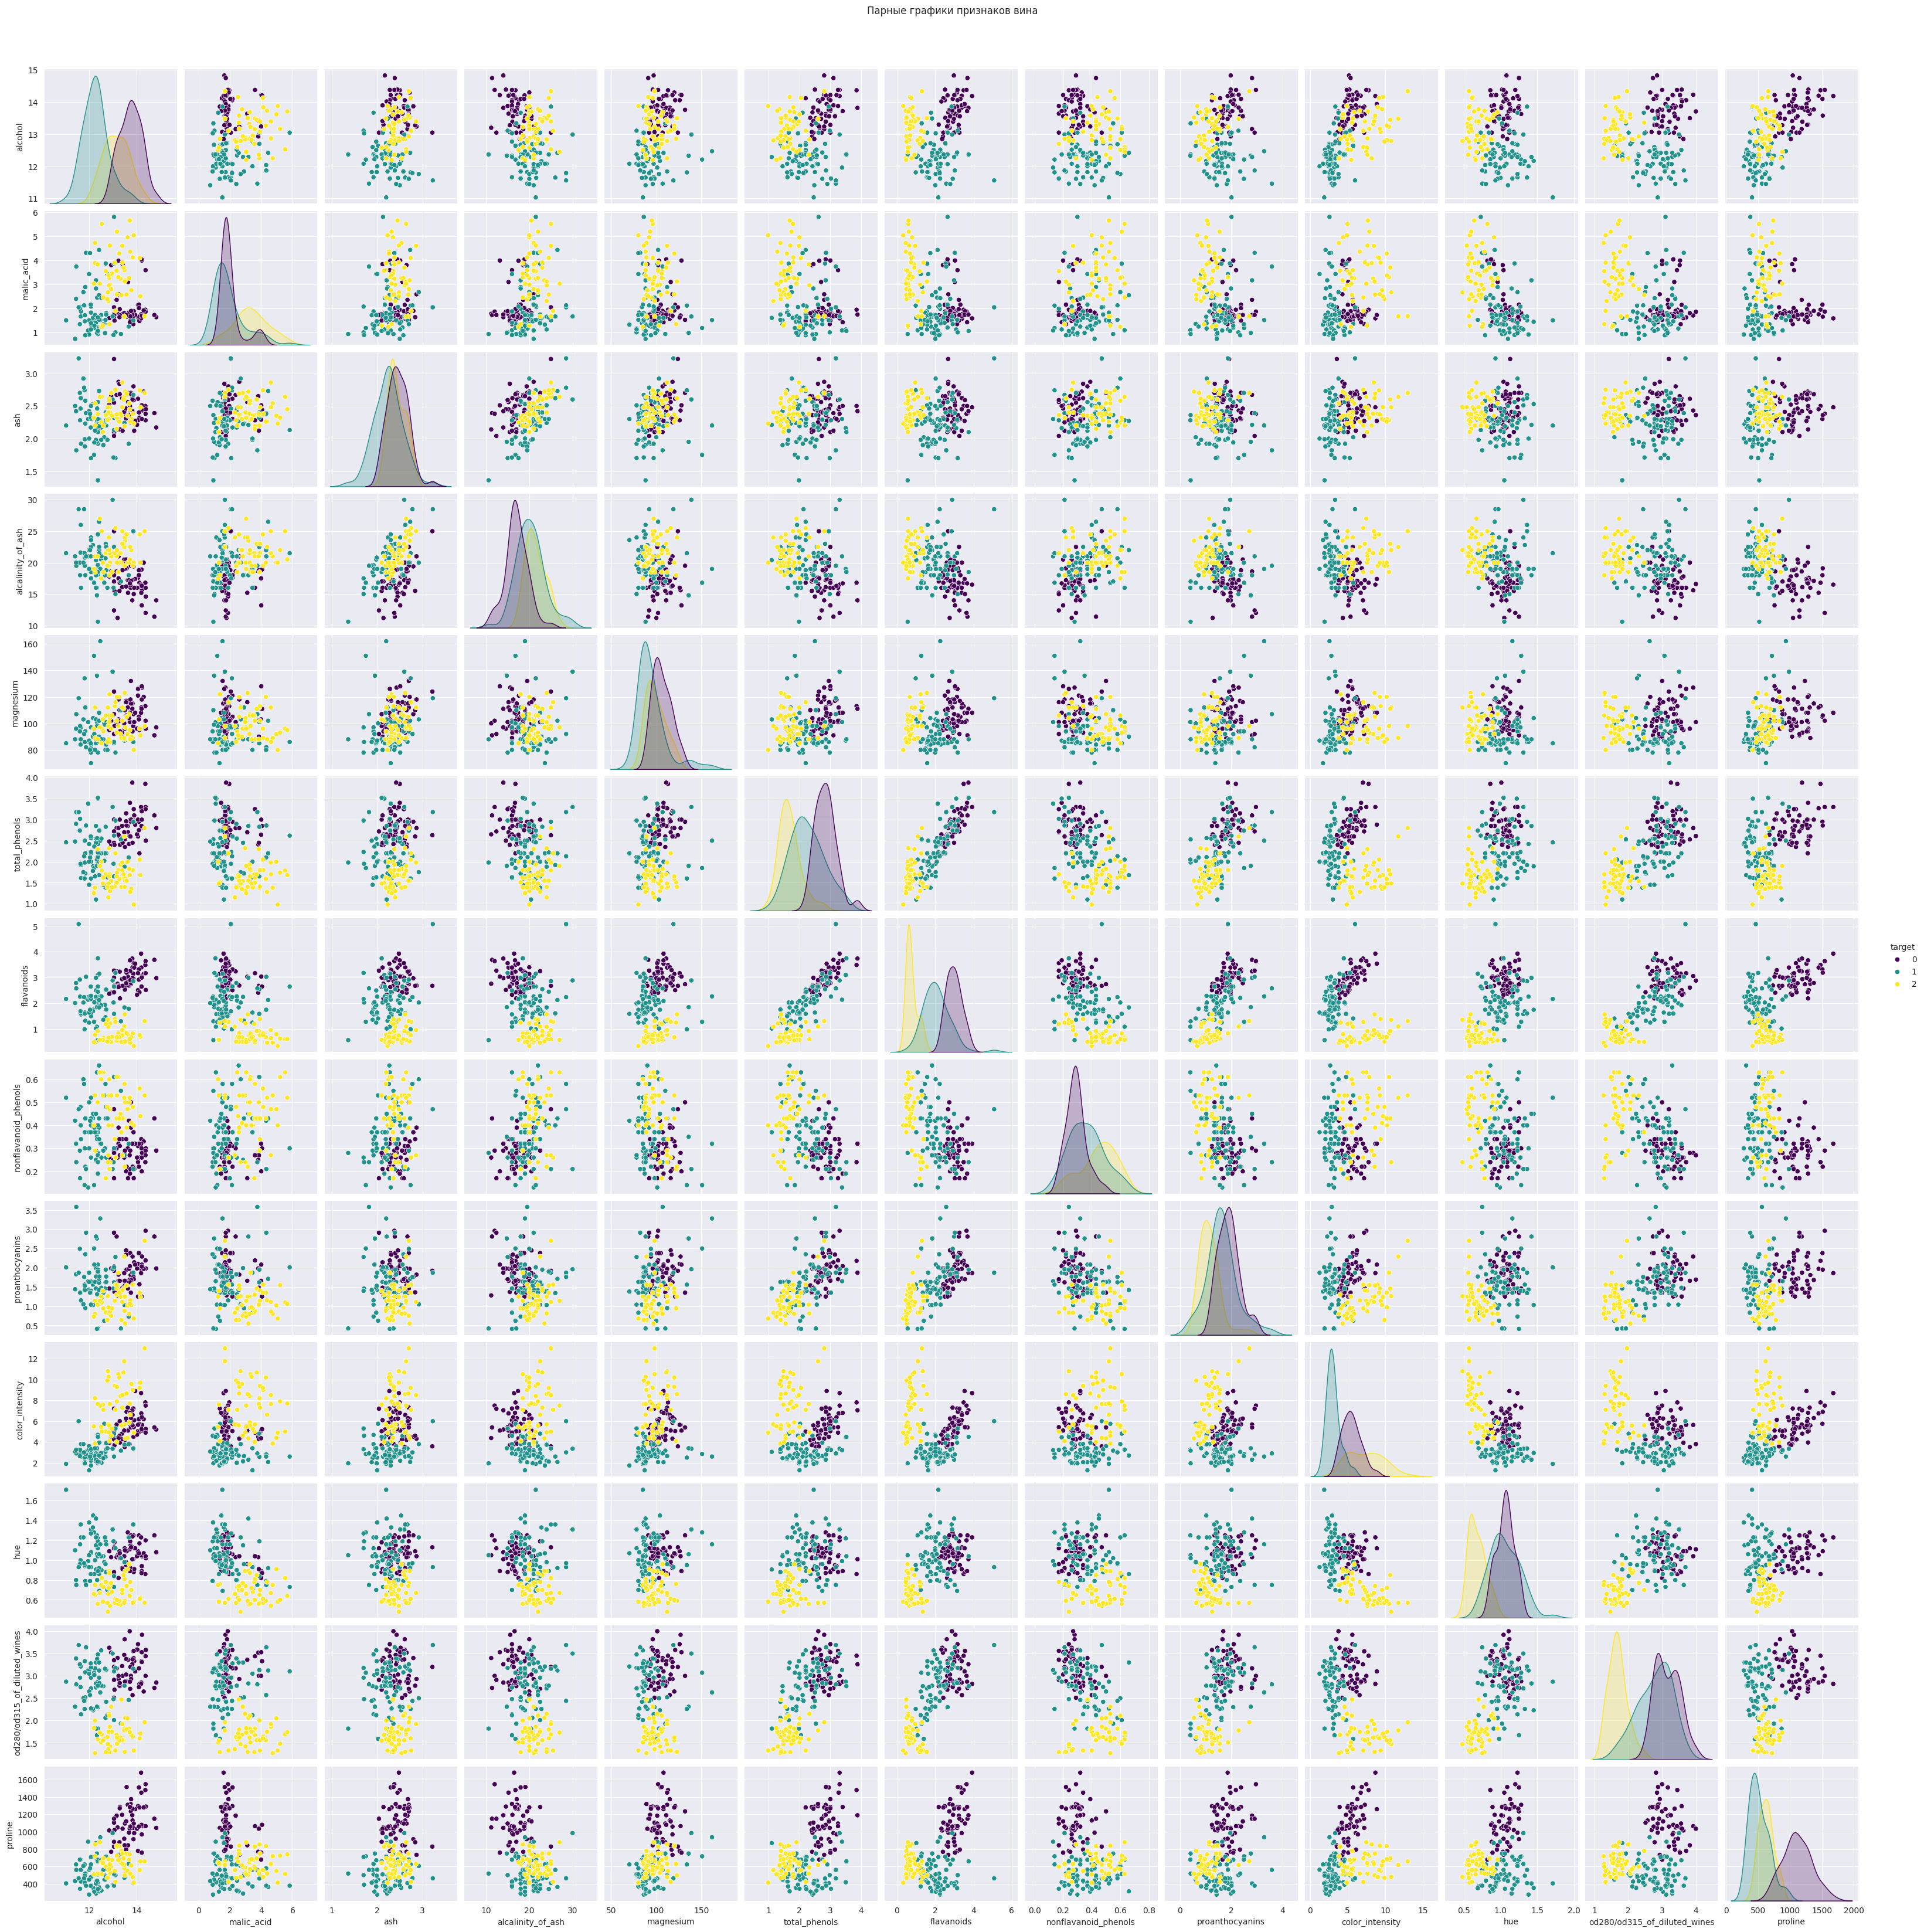

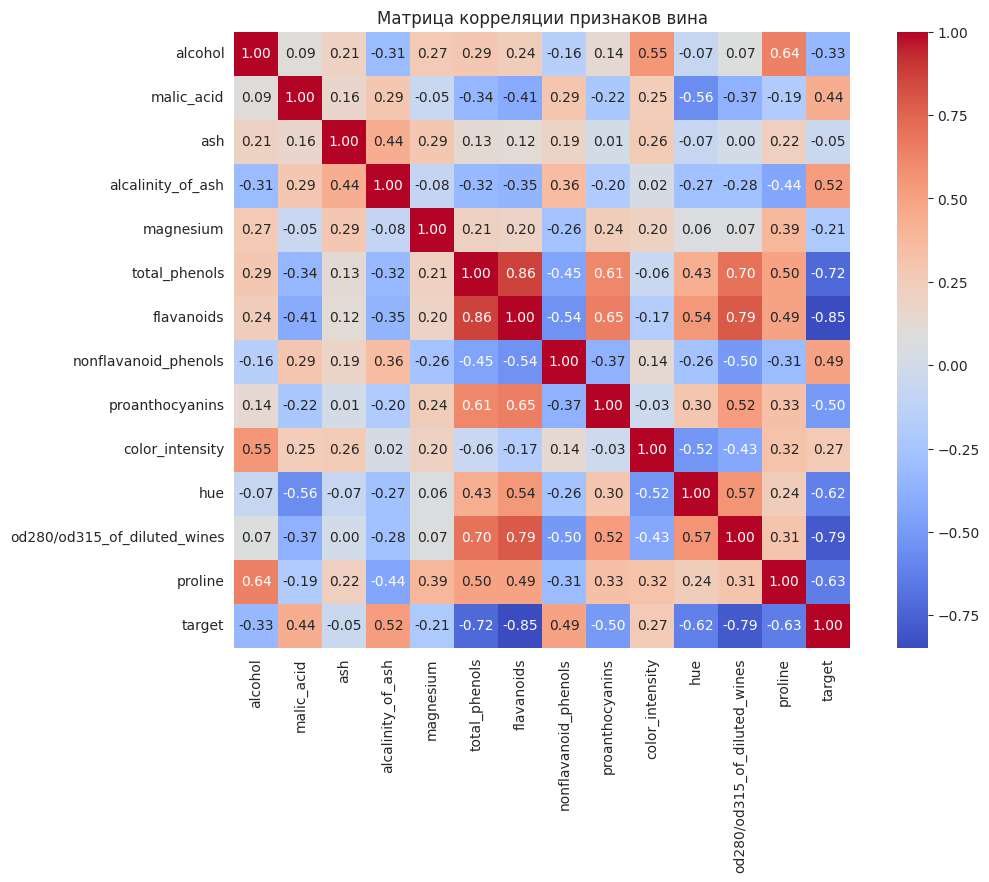

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=wine_dataframe, palette='viridis')
plt.title('Распределение классов вина')
plt.xlabel('Класс вина')
plt.ylabel('Количество')
plt.xticks([0, 1, 2], ['Класс 0', 'Класс 1', 'Класс 2'])
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 10))
sns.pairplot(wine_dataframe, hue='target', palette='viridis')
plt.suptitle('Парные графики признаков вина', y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = wine_dataframe.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Матрица корреляции признаков вина')
plt.show()


In [49]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  
knn_classifier.fit(X_train, y_train)

random_sample = np.random.uniform(low=features_matrix.min().values, high=features_matrix.max().values, size=(1, features_matrix.shape[1]))
predicted_class_label = knn_classifier.predict(random_sample)

print(f'Случайные данные: {random_sample}')
print(f'Предсказанный класс для случайных данных: {predicted_class_label[0]}')


Случайные данные: [[1.13114262e+01 3.04178577e+00 2.86683065e+00 2.28922528e+01
  1.19372717e+02 3.59215295e+00 4.62180148e+00 3.22870887e-01
  1.54839973e+00 1.03597758e+01 1.45842890e+00 3.46359197e+00
  6.97472551e+02]]
Предсказанный класс для случайных данных: 2


/home/amit/PycharmProjects/BigDateLaba /venv/lib64/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [50]:
predicted_targets = knn_classifier.predict(X_test)

In [51]:
accuracy_score_value = accuracy_score(y_test, predicted_targets)

print(f'Точность на тестовом наборе: {accuracy_score_value:.2f}')


Точность на тестовом наборе: 0.71


Вывод:

С помощью метода k-ближайших соседей мы достигли удовлетворительной точности на тестовых данных, что свидетельствует о хорошем разделении классов в наборе данных о вине. Визуализация распределения классов и корреляции признаков показала, что признаки имеют различные уровни взаимосвязи, что может помочь в дальнейшем анализе. Тем не менее, рекомендуется проводить эксперименты с различными значениями параметра k, а также рассмотреть другие методы классификации, такие как деревья решений или метод опорных векторов, чтобы улучшить результаты и получить более точное понимание структуры данных.